In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dropout, Dense

from scipy import stats
from scipy.interpolate import make_interp_spline, BSpline

from find_accuracy import evaluate

Using TensorFlow backend.


# Lese fil og fjerne indeks

In [3]:
data = pd.read_csv('../data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data = data.dropna(axis = 'columns')

In [5]:
data = data.drop("id", axis = 1)

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#data["diagnosis"] = data["diagnosis"].replace({'M': 1, 'B': 0})

In [8]:
enc = LabelEncoder()
enc.fit(data["diagnosis"])
data["diagnosis"] = enc.transform(data["diagnosis"])

In [9]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Fjerne outliers

In [10]:
z = np.abs(stats.zscore(data))

In [11]:
threshold = 3
np.where(z > threshold)

(array([  0,   3,   3,   3,   3,   3,   3,   3,   3,   9,   9,   9,  12,
         12,  12,  12,  12,  14,  14,  23,  25,  31,  31,  35,  42,  42,
         42,  60,  68,  68,  68,  68,  71,  71,  71,  71,  72,  78,  78,
         78,  78,  78,  82,  82,  82,  82,  82,  82,  82,  83, 105, 105,
        108, 108, 108, 108, 108, 108, 112, 112, 116, 119, 119, 122, 122,
        122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
        138, 138, 146, 146, 146, 151, 151, 152, 152, 152, 152, 152, 152,
        176, 176, 180, 180, 180, 180, 180, 180, 180, 181, 181, 190, 190,
        190, 190, 190, 192, 202, 203, 212, 212, 212, 212, 212, 212, 212,
        213, 213, 213, 213, 213, 219, 219, 232, 236, 236, 239, 239, 258,
        258, 258, 259, 259, 265, 265, 265, 265, 265, 288, 288, 290, 290,
        314, 314, 318, 323, 339, 339, 345, 351, 352, 352, 352, 352, 352,
        352, 352, 352, 368, 368, 370, 376, 376, 376, 379, 379, 379, 388,
        389, 400, 416, 417, 417, 430, 461, 461, 461

In [12]:
data = data[(z < threshold).all(axis = 1)]

In [13]:
data.shape

(495, 31)

# Splitte data

In [14]:
X = data.drop(["diagnosis"], axis = 1)
y = data["diagnosis"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Dummy Classifier

In [16]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

In [17]:
evaluate(y_pred, y_test)

{'accuracy': '0.5',
 'precision': '0.19047619047619047',
 'recall': '0.2222222222222222',
 'f1': '0.20512820512820512'}

# No Gridsearch

In [42]:
results = []

In [43]:
algorithms = {
    'model': [LogisticRegression, SGDClassifier]}

In [44]:
for idx, algorithm in enumerate(tqdm(algorithms["model"])):
    y_pred = algorithm().fit(X_train, y_train).predict(X_test)
    print(f'\nmodel = {algorithm.__name__}')
    scores = evaluate(y_pred, y_test)
    results.append(scores["accuracy"])

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


model = LogisticRegression

model = SGDClassifier


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 125.06it/s]


In [45]:
results

['0.967741935483871', '0.8951612903225806']

# Auto ML (gridsearch)

In [46]:
results_cv = []

In [47]:
algorithms = {
    'model': [LogisticRegression, SGDClassifier],
    'hyperparameters': [{"C":np.logspace(-3,3,7),
                         "penalty":["l1","l2"]}, 
                       {
                        'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
                        'n_iter': [1000], 
                        'loss': ['log'], 
                        'penalty': ['l2'],
                        'n_jobs': [-1]}]}

In [48]:
for idx, algorithm in enumerate(tqdm(algorithms["model"])):
    algorithm_cv = GridSearchCV(algorithm(), algorithms['hyperparameters'][idx])
    y_pred = algorithm_cv.fit(X_train, y_train).predict(X_test)
    print(f'\nmodel = {algorithm.__name__}')
    scores = evaluate(y_pred, y_test)
    results_cv.append(scores["accuracy"])

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


model = LogisticRegression


 50%|██████████████████████████████████████████                                          | 1/2 [00:03<00:03,  3.35s/it]


model = SGDClassifier


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.64s/it]


In [49]:
results_cv

['0.9838709677419355', '0.9435483870967742']

In [50]:
f'økning på {(float(results_cv[0]) - float(results[0])) * 100} prosent'

'økning på 1.6129032258064502 prosent'

# Deep learning

In [27]:
model = Sequential()

model.add(Dense(32, input_shape = (X_train.shape[1], )))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                992       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 5,217
Trainable params: 5,217
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
results = model.fit(X_train, y_train, epochs = 1000, verbose=1, validation_data=(X_test, y_test))

Train on 371 samples, validate on 124 samples
Epoch 1/1000
371/371 [==============================] - ETA: 0s - loss: 0.1924 - acc: 0.937 - 0s 67us/step - loss: 0.3860 - acc: 0.8868 - val_loss: 0.1704 - val_acc: 0.9516
Epoch 2/1000
371/371 [==============================] - ETA: 0s - loss: 0.4629 - acc: 0.843 - 0s 70us/step - loss: 0.3685 - acc: 0.9003 - val_loss: 0.1667 - val_acc: 0.9516
Epoch 3/1000
371/371 [==============================] - ETA: 0s - loss: 0.1715 - acc: 0.937 - 0s 70us/step - loss: 0.3462 - acc: 0.8976 - val_loss: 0.1696 - val_acc: 0.9435
Epoch 4/1000
371/371 [==============================] - ETA: 0s - loss: 0.1356 - acc: 0.937 - 0s 67us/step - loss: 0.3144 - acc: 0.9057 - val_loss: 0.1684 - val_acc: 0.9516
Epoch 5/1000
371/371 [==============================] - ETA: 0s - loss: 0.2003 - acc: 0.937 - 0s 67us/step - loss: 0.3792 - acc: 0.8976 - val_loss: 0.1851 - val_acc: 0.9516
Epoch 6/1000
371/371 [==============================] - ETA: 0s - loss: 0.2531 - acc: 0.9

Epoch 48/1000
371/371 [==============================] - ETA: 0s - loss: 0.0579 - acc: 1.000 - 0s 65us/step - loss: 0.2965 - acc: 0.9164 - val_loss: 0.1539 - val_acc: 0.9274
Epoch 49/1000
371/371 [==============================] - ETA: 0s - loss: 0.1013 - acc: 1.000 - 0s 73us/step - loss: 0.2441 - acc: 0.9191 - val_loss: 0.1699 - val_acc: 0.9355
Epoch 50/1000
371/371 [==============================] - ETA: 0s - loss: 0.3024 - acc: 0.812 - 0s 84us/step - loss: 0.2210 - acc: 0.9084 - val_loss: 0.1764 - val_acc: 0.9516
Epoch 51/1000
371/371 [==============================] - ETA: 0s - loss: 0.3462 - acc: 0.875 - 0s 73us/step - loss: 0.2385 - acc: 0.9164 - val_loss: 0.1656 - val_acc: 0.9355
Epoch 52/1000
371/371 [==============================] - ETA: 0s - loss: 0.2625 - acc: 0.875 - 0s 65us/step - loss: 0.2208 - acc: 0.9245 - val_loss: 0.1640 - val_acc: 0.9516
Epoch 53/1000
371/371 [==============================] - ETA: 0s - loss: 0.1199 - acc: 0.968 - 0s 65us/step - loss: 0.2385 - acc: 

371/371 [==============================] - ETA: 0s - loss: 0.2043 - acc: 0.906 - 0s 67us/step - loss: 0.2101 - acc: 0.9111 - val_loss: 0.1501 - val_acc: 0.9516
Epoch 96/1000
371/371 [==============================] - ETA: 0s - loss: 0.0676 - acc: 1.000 - 0s 65us/step - loss: 0.2147 - acc: 0.9191 - val_loss: 0.1531 - val_acc: 0.9355
Epoch 97/1000
371/371 [==============================] - ETA: 0s - loss: 0.0929 - acc: 1.000 - 0s 73us/step - loss: 0.1916 - acc: 0.9137 - val_loss: 0.1535 - val_acc: 0.9355
Epoch 98/1000
371/371 [==============================] - ETA: 0s - loss: 0.2618 - acc: 0.937 - 0s 70us/step - loss: 0.2330 - acc: 0.9164 - val_loss: 0.1518 - val_acc: 0.9516
Epoch 99/1000
371/371 [==============================] - ETA: 0s - loss: 0.1634 - acc: 0.906 - 0s 78us/step - loss: 0.2202 - acc: 0.9057 - val_loss: 0.1446 - val_acc: 0.9355
Epoch 100/1000
371/371 [==============================] - ETA: 0s - loss: 0.0826 - acc: 0.968 - 0s 70us/step - loss: 0.1920 - acc: 0.9245 - val_

Epoch 142/1000
371/371 [==============================] - ETA: 0s - loss: 0.2263 - acc: 0.875 - 0s 75us/step - loss: 0.1831 - acc: 0.9353 - val_loss: 0.1374 - val_acc: 0.9435
Epoch 143/1000
371/371 [==============================] - ETA: 0s - loss: 0.1246 - acc: 0.937 - 0s 73us/step - loss: 0.1815 - acc: 0.9245 - val_loss: 0.1364 - val_acc: 0.9355
Epoch 144/1000
371/371 [==============================] - ETA: 0s - loss: 0.2137 - acc: 0.906 - 0s 73us/step - loss: 0.1988 - acc: 0.9272 - val_loss: 0.1339 - val_acc: 0.9435
Epoch 145/1000
371/371 [==============================] - ETA: 0s - loss: 0.0844 - acc: 1.000 - 0s 65us/step - loss: 0.1918 - acc: 0.9326 - val_loss: 0.1437 - val_acc: 0.9516
Epoch 146/1000
371/371 [==============================] - ETA: 0s - loss: 0.1245 - acc: 0.968 - 0s 70us/step - loss: 0.1913 - acc: 0.9218 - val_loss: 0.1428 - val_acc: 0.9516
Epoch 147/1000
371/371 [==============================] - ETA: 0s - loss: 0.1733 - acc: 0.937 - 0s 73us/step - loss: 0.2081 -

Epoch 189/1000
371/371 [==============================] - ETA: 0s - loss: 0.1881 - acc: 0.906 - 0s 65us/step - loss: 0.1858 - acc: 0.9434 - val_loss: 0.1253 - val_acc: 0.9435
Epoch 190/1000
371/371 [==============================] - ETA: 0s - loss: 0.0600 - acc: 1.000 - 0s 70us/step - loss: 0.1772 - acc: 0.9299 - val_loss: 0.1348 - val_acc: 0.9435
Epoch 191/1000
371/371 [==============================] - ETA: 0s - loss: 0.1757 - acc: 0.968 - 0s 84us/step - loss: 0.1703 - acc: 0.9353 - val_loss: 0.1330 - val_acc: 0.9516
Epoch 192/1000
371/371 [==============================] - ETA: 0s - loss: 0.1038 - acc: 0.937 - 0s 65us/step - loss: 0.1601 - acc: 0.9407 - val_loss: 0.1347 - val_acc: 0.9435
Epoch 193/1000
371/371 [==============================] - ETA: 0s - loss: 0.1373 - acc: 0.937 - 0s 67us/step - loss: 0.1635 - acc: 0.9299 - val_loss: 0.1318 - val_acc: 0.9516
Epoch 194/1000
371/371 [==============================] - ETA: 0s - loss: 0.1768 - acc: 0.906 - 0s 65us/step - loss: 0.1853 -

Epoch 236/1000
371/371 [==============================] - ETA: 0s - loss: 0.1627 - acc: 0.937 - 0s 73us/step - loss: 0.1672 - acc: 0.9326 - val_loss: 0.1212 - val_acc: 0.9435
Epoch 237/1000
371/371 [==============================] - ETA: 0s - loss: 0.1375 - acc: 0.937 - 0s 67us/step - loss: 0.1627 - acc: 0.9299 - val_loss: 0.1177 - val_acc: 0.9597
Epoch 238/1000
371/371 [==============================] - ETA: 0s - loss: 0.2382 - acc: 0.875 - 0s 81us/step - loss: 0.1542 - acc: 0.9326 - val_loss: 0.1177 - val_acc: 0.9597
Epoch 239/1000
371/371 [==============================] - ETA: 0s - loss: 0.0838 - acc: 0.968 - 0s 78us/step - loss: 0.1762 - acc: 0.9299 - val_loss: 0.1134 - val_acc: 0.9516
Epoch 240/1000
371/371 [==============================] - ETA: 0s - loss: 0.0802 - acc: 0.968 - 0s 78us/step - loss: 0.1731 - acc: 0.9272 - val_loss: 0.1361 - val_acc: 0.9435
Epoch 241/1000
371/371 [==============================] - ETA: 0s - loss: 0.2549 - acc: 0.937 - 0s 75us/step - loss: 0.1649 -

Epoch 283/1000
371/371 [==============================] - ETA: 0s - loss: 0.2026 - acc: 0.937 - 0s 70us/step - loss: 0.1561 - acc: 0.9461 - val_loss: 0.1251 - val_acc: 0.9597
Epoch 284/1000
371/371 [==============================] - ETA: 0s - loss: 0.0354 - acc: 1.000 - 0s 70us/step - loss: 0.1505 - acc: 0.9353 - val_loss: 0.1263 - val_acc: 0.9597
Epoch 285/1000
371/371 [==============================] - ETA: 0s - loss: 0.1491 - acc: 0.937 - 0s 81us/step - loss: 0.1713 - acc: 0.9326 - val_loss: 0.1315 - val_acc: 0.9597
Epoch 286/1000
371/371 [==============================] - ETA: 0s - loss: 0.3119 - acc: 0.875 - 0s 75us/step - loss: 0.1328 - acc: 0.9569 - val_loss: 0.1226 - val_acc: 0.9597
Epoch 287/1000
371/371 [==============================] - ETA: 0s - loss: 0.1193 - acc: 0.937 - 0s 70us/step - loss: 0.1423 - acc: 0.9461 - val_loss: 0.1093 - val_acc: 0.9516
Epoch 288/1000
371/371 [==============================] - ETA: 0s - loss: 0.0870 - acc: 0.937 - 0s 78us/step - loss: 0.1490 -

Epoch 330/1000
371/371 [==============================] - ETA: 0s - loss: 0.0677 - acc: 1.000 - 0s 67us/step - loss: 0.1384 - acc: 0.9488 - val_loss: 0.1162 - val_acc: 0.9516
Epoch 331/1000
371/371 [==============================] - ETA: 0s - loss: 0.1891 - acc: 0.906 - 0s 67us/step - loss: 0.1657 - acc: 0.9326 - val_loss: 0.1169 - val_acc: 0.9597
Epoch 332/1000
371/371 [==============================] - ETA: 0s - loss: 0.0395 - acc: 1.000 - 0s 73us/step - loss: 0.1309 - acc: 0.9434 - val_loss: 0.1149 - val_acc: 0.9597
Epoch 333/1000
371/371 [==============================] - ETA: 0s - loss: 0.0832 - acc: 0.968 - 0s 67us/step - loss: 0.1352 - acc: 0.9488 - val_loss: 0.1126 - val_acc: 0.9597
Epoch 334/1000
371/371 [==============================] - ETA: 0s - loss: 0.1782 - acc: 0.906 - 0s 62us/step - loss: 0.1346 - acc: 0.9380 - val_loss: 0.1110 - val_acc: 0.9597
Epoch 335/1000
371/371 [==============================] - ETA: 0s - loss: 0.0772 - acc: 0.968 - 0s 67us/step - loss: 0.1316 -

Epoch 377/1000
371/371 [==============================] - ETA: 0s - loss: 0.1194 - acc: 0.937 - 0s 67us/step - loss: 0.1257 - acc: 0.9488 - val_loss: 0.1185 - val_acc: 0.9516
Epoch 378/1000
371/371 [==============================] - ETA: 0s - loss: 0.2634 - acc: 0.906 - 0s 67us/step - loss: 0.1351 - acc: 0.9434 - val_loss: 0.1104 - val_acc: 0.9677
Epoch 379/1000
371/371 [==============================] - ETA: 0s - loss: 0.1492 - acc: 0.968 - 0s 78us/step - loss: 0.1274 - acc: 0.9488 - val_loss: 0.1095 - val_acc: 0.9516
Epoch 380/1000
371/371 [==============================] - ETA: 0s - loss: 0.1061 - acc: 0.968 - 0s 70us/step - loss: 0.1287 - acc: 0.9488 - val_loss: 0.1271 - val_acc: 0.9435
Epoch 381/1000
371/371 [==============================] - ETA: 0s - loss: 0.0877 - acc: 0.968 - 0s 67us/step - loss: 0.1507 - acc: 0.9407 - val_loss: 0.1146 - val_acc: 0.9597
Epoch 382/1000
371/371 [==============================] - ETA: 0s - loss: 0.1466 - acc: 0.937 - 0s 73us/step - loss: 0.1444 -

Epoch 424/1000
371/371 [==============================] - ETA: 0s - loss: 0.1339 - acc: 0.937 - 0s 73us/step - loss: 0.1300 - acc: 0.9461 - val_loss: 0.1057 - val_acc: 0.9516
Epoch 425/1000
371/371 [==============================] - ETA: 0s - loss: 0.1682 - acc: 0.937 - 0s 78us/step - loss: 0.1301 - acc: 0.9488 - val_loss: 0.1142 - val_acc: 0.9597
Epoch 426/1000
371/371 [==============================] - ETA: 0s - loss: 0.2536 - acc: 0.875 - ETA: 0s - loss: 0.1353 - acc: 0.951 - 0s 175us/step - loss: 0.1372 - acc: 0.9515 - val_loss: 0.1222 - val_acc: 0.9516
Epoch 427/1000
371/371 [==============================] - ETA: 0s - loss: 0.1928 - acc: 0.937 - 0s 98us/step - loss: 0.1388 - acc: 0.9353 - val_loss: 0.1015 - val_acc: 0.9597
Epoch 428/1000
371/371 [==============================] - ETA: 0s - loss: 0.1057 - acc: 0.937 - 0s 73us/step - loss: 0.1563 - acc: 0.9299 - val_loss: 0.1079 - val_acc: 0.9597
Epoch 429/1000
371/371 [==============================] - ETA: 0s - loss: 0.2244 - acc

Epoch 471/1000
371/371 [==============================] - ETA: 0s - loss: 0.1154 - acc: 0.937 - 0s 75us/step - loss: 0.1344 - acc: 0.9434 - val_loss: 0.0999 - val_acc: 0.9597
Epoch 472/1000
371/371 [==============================] - ETA: 0s - loss: 0.1266 - acc: 0.937 - 0s 89us/step - loss: 0.1220 - acc: 0.9461 - val_loss: 0.0968 - val_acc: 0.9597
Epoch 473/1000
371/371 [==============================] - ETA: 0s - loss: 0.1119 - acc: 0.968 - 0s 67us/step - loss: 0.1231 - acc: 0.9407 - val_loss: 0.1020 - val_acc: 0.9435
Epoch 474/1000
371/371 [==============================] - ETA: 0s - loss: 0.1437 - acc: 0.937 - 0s 65us/step - loss: 0.1145 - acc: 0.9569 - val_loss: 0.1018 - val_acc: 0.9516
Epoch 475/1000
371/371 [==============================] - ETA: 0s - loss: 0.3046 - acc: 0.875 - 0s 67us/step - loss: 0.1129 - acc: 0.9569 - val_loss: 0.1042 - val_acc: 0.9516
Epoch 476/1000
371/371 [==============================] - ETA: 0s - loss: 0.1795 - acc: 0.906 - 0s 65us/step - loss: 0.1283 -

Epoch 518/1000
371/371 [==============================] - ETA: 0s - loss: 0.1223 - acc: 0.937 - 0s 70us/step - loss: 0.1018 - acc: 0.9542 - val_loss: 0.1028 - val_acc: 0.9516
Epoch 519/1000
371/371 [==============================] - ETA: 0s - loss: 0.0472 - acc: 1.000 - 0s 75us/step - loss: 0.1242 - acc: 0.9461 - val_loss: 0.1092 - val_acc: 0.9516
Epoch 520/1000
371/371 [==============================] - ETA: 0s - loss: 0.0693 - acc: 0.968 - 0s 70us/step - loss: 0.1094 - acc: 0.9569 - val_loss: 0.0901 - val_acc: 0.9758
Epoch 521/1000
371/371 [==============================] - ETA: 0s - loss: 0.0637 - acc: 0.968 - 0s 70us/step - loss: 0.0999 - acc: 0.9596 - val_loss: 0.0877 - val_acc: 0.9597
Epoch 522/1000
371/371 [==============================] - ETA: 0s - loss: 0.0465 - acc: 1.000 - 0s 67us/step - loss: 0.0983 - acc: 0.9623 - val_loss: 0.0948 - val_acc: 0.9516
Epoch 523/1000
371/371 [==============================] - ETA: 0s - loss: 0.2171 - acc: 0.906 - 0s 73us/step - loss: 0.1195 -

Epoch 565/1000
371/371 [==============================] - ETA: 0s - loss: 0.0908 - acc: 0.968 - 0s 67us/step - loss: 0.1086 - acc: 0.9407 - val_loss: 0.1414 - val_acc: 0.9435
Epoch 566/1000
371/371 [==============================] - ETA: 0s - loss: 0.0100 - acc: 1.000 - 0s 73us/step - loss: 0.1151 - acc: 0.9542 - val_loss: 0.1080 - val_acc: 0.9516
Epoch 567/1000
371/371 [==============================] - ETA: 0s - loss: 0.0697 - acc: 1.000 - 0s 75us/step - loss: 0.1098 - acc: 0.9650 - val_loss: 0.1042 - val_acc: 0.9435
Epoch 568/1000
371/371 [==============================] - ETA: 0s - loss: 0.2466 - acc: 0.906 - 0s 73us/step - loss: 0.1227 - acc: 0.9461 - val_loss: 0.0976 - val_acc: 0.9516
Epoch 569/1000
371/371 [==============================] - ETA: 0s - loss: 0.0457 - acc: 0.968 - 0s 92us/step - loss: 0.1313 - acc: 0.9407 - val_loss: 0.1006 - val_acc: 0.9355
Epoch 570/1000
371/371 [==============================] - ETA: 0s - loss: 0.0514 - acc: 1.000 - 0s 129us/step - loss: 0.1041 

Epoch 612/1000
371/371 [==============================] - ETA: 0s - loss: 0.0864 - acc: 0.968 - 0s 81us/step - loss: 0.0983 - acc: 0.9623 - val_loss: 0.0925 - val_acc: 0.9597
Epoch 613/1000
371/371 [==============================] - ETA: 0s - loss: 0.0633 - acc: 0.968 - 0s 70us/step - loss: 0.1052 - acc: 0.9596 - val_loss: 0.0967 - val_acc: 0.9597
Epoch 614/1000
371/371 [==============================] - ETA: 0s - loss: 0.0594 - acc: 1.000 - 0s 86us/step - loss: 0.0930 - acc: 0.9596 - val_loss: 0.0722 - val_acc: 0.9919
Epoch 615/1000
371/371 [==============================] - ETA: 0s - loss: 0.0104 - acc: 1.000 - 0s 97us/step - loss: 0.1217 - acc: 0.9515 - val_loss: 0.0917 - val_acc: 0.9516
Epoch 616/1000
371/371 [==============================] - ETA: 0s - loss: 0.0185 - acc: 1.000 - 0s 94us/step - loss: 0.0949 - acc: 0.9515 - val_loss: 0.0949 - val_acc: 0.9677
Epoch 617/1000
371/371 [==============================] - ETA: 0s - loss: 0.0741 - acc: 0.937 - 0s 84us/step - loss: 0.0942 -

Epoch 659/1000
371/371 [==============================] - ETA: 0s - loss: 0.0561 - acc: 0.968 - 0s 67us/step - loss: 0.0899 - acc: 0.9623 - val_loss: 0.1129 - val_acc: 0.9516
Epoch 660/1000
371/371 [==============================] - ETA: 0s - loss: 0.1282 - acc: 0.906 - 0s 70us/step - loss: 0.0928 - acc: 0.9488 - val_loss: 0.0753 - val_acc: 0.9677
Epoch 661/1000
371/371 [==============================] - ETA: 0s - loss: 0.0310 - acc: 1.000 - 0s 73us/step - loss: 0.1059 - acc: 0.9542 - val_loss: 0.0788 - val_acc: 0.9677
Epoch 662/1000
371/371 [==============================] - ETA: 0s - loss: 0.0747 - acc: 0.968 - 0s 67us/step - loss: 0.1213 - acc: 0.9569 - val_loss: 0.0824 - val_acc: 0.9839
Epoch 663/1000
371/371 [==============================] - ETA: 0s - loss: 0.0235 - acc: 1.000 - 0s 81us/step - loss: 0.1174 - acc: 0.9596 - val_loss: 0.1020 - val_acc: 0.9516
Epoch 664/1000
371/371 [==============================] - ETA: 0s - loss: 0.0932 - acc: 0.968 - 0s 70us/step - loss: 0.0902 -

Epoch 706/1000
371/371 [==============================] - ETA: 0s - loss: 0.0857 - acc: 0.968 - 0s 73us/step - loss: 0.0910 - acc: 0.9596 - val_loss: 0.0777 - val_acc: 0.9597
Epoch 707/1000
371/371 [==============================] - ETA: 0s - loss: 0.0916 - acc: 0.937 - 0s 65us/step - loss: 0.1157 - acc: 0.9515 - val_loss: 0.0697 - val_acc: 0.9597
Epoch 708/1000
371/371 [==============================] - ETA: 0s - loss: 0.1489 - acc: 0.906 - 0s 70us/step - loss: 0.1166 - acc: 0.9434 - val_loss: 0.1024 - val_acc: 0.9516
Epoch 709/1000
371/371 [==============================] - ETA: 0s - loss: 0.1396 - acc: 0.937 - 0s 73us/step - loss: 0.1268 - acc: 0.9488 - val_loss: 0.0872 - val_acc: 0.9516
Epoch 710/1000
371/371 [==============================] - ETA: 0s - loss: 0.1557 - acc: 0.937 - 0s 137us/step - loss: 0.0908 - acc: 0.9650 - val_loss: 0.0790 - val_acc: 0.9597
Epoch 711/1000
371/371 [==============================] - ETA: 0s - loss: 0.1312 - acc: 0.937 - 0s 75us/step - loss: 0.0972 

Epoch 753/1000
371/371 [==============================] - ETA: 0s - loss: 0.0608 - acc: 0.968 - 0s 67us/step - loss: 0.0703 - acc: 0.9623 - val_loss: 0.0792 - val_acc: 0.9516
Epoch 754/1000
371/371 [==============================] - ETA: 0s - loss: 0.1599 - acc: 0.906 - 0s 67us/step - loss: 0.0994 - acc: 0.9542 - val_loss: 0.0801 - val_acc: 0.9516
Epoch 755/1000
371/371 [==============================] - ETA: 0s - loss: 0.0134 - acc: 1.000 - 0s 73us/step - loss: 0.0862 - acc: 0.9623 - val_loss: 0.0830 - val_acc: 0.9435
Epoch 756/1000
371/371 [==============================] - ETA: 0s - loss: 0.2286 - acc: 0.906 - 0s 78us/step - loss: 0.1061 - acc: 0.9515 - val_loss: 0.0877 - val_acc: 0.9597
Epoch 757/1000
371/371 [==============================] - ETA: 0s - loss: 0.0717 - acc: 0.968 - 0s 65us/step - loss: 0.0950 - acc: 0.9623 - val_loss: 0.0833 - val_acc: 0.9516
Epoch 758/1000
371/371 [==============================] - ETA: 0s - loss: 0.1193 - acc: 0.906 - 0s 89us/step - loss: 0.1123 -

Epoch 800/1000
371/371 [==============================] - ETA: 0s - loss: 0.1421 - acc: 0.937 - 0s 70us/step - loss: 0.1137 - acc: 0.9461 - val_loss: 0.0895 - val_acc: 0.9597
Epoch 801/1000
371/371 [==============================] - ETA: 0s - loss: 0.0428 - acc: 0.968 - 0s 67us/step - loss: 0.1213 - acc: 0.9407 - val_loss: 0.1071 - val_acc: 0.9516
Epoch 802/1000
371/371 [==============================] - ETA: 0s - loss: 0.1159 - acc: 0.968 - 0s 67us/step - loss: 0.1202 - acc: 0.9542 - val_loss: 0.1087 - val_acc: 0.9435
Epoch 803/1000
371/371 [==============================] - ETA: 0s - loss: 0.0900 - acc: 0.968 - 0s 70us/step - loss: 0.0977 - acc: 0.9542 - val_loss: 0.0866 - val_acc: 0.9677
Epoch 804/1000
371/371 [==============================] - ETA: 0s - loss: 0.0668 - acc: 0.968 - 0s 67us/step - loss: 0.0953 - acc: 0.9569 - val_loss: 0.0869 - val_acc: 0.9435
Epoch 805/1000
371/371 [==============================] - ETA: 0s - loss: 0.0312 - acc: 0.968 - 0s 67us/step - loss: 0.1048 -

Epoch 847/1000
371/371 [==============================] - ETA: 0s - loss: 0.0502 - acc: 1.000 - 0s 67us/step - loss: 0.0774 - acc: 0.9730 - val_loss: 0.0694 - val_acc: 0.9677
Epoch 848/1000
371/371 [==============================] - ETA: 0s - loss: 0.0411 - acc: 0.968 - 0s 70us/step - loss: 0.0672 - acc: 0.9677 - val_loss: 0.0723 - val_acc: 0.9516
Epoch 849/1000
371/371 [==============================] - ETA: 0s - loss: 0.1149 - acc: 0.937 - 0s 86us/step - loss: 0.0856 - acc: 0.9542 - val_loss: 0.0677 - val_acc: 0.9597
Epoch 850/1000
371/371 [==============================] - ETA: 0s - loss: 0.1175 - acc: 0.937 - 0s 70us/step - loss: 0.0721 - acc: 0.9650 - val_loss: 0.0668 - val_acc: 0.9839
Epoch 851/1000
371/371 [==============================] - ETA: 0s - loss: 0.0962 - acc: 0.937 - 0s 67us/step - loss: 0.0656 - acc: 0.9730 - val_loss: 0.0979 - val_acc: 0.9435
Epoch 852/1000
371/371 [==============================] - ETA: 0s - loss: 0.0524 - acc: 1.000 - 0s 81us/step - loss: 0.0755 -

Epoch 894/1000
371/371 [==============================] - ETA: 0s - loss: 0.0618 - acc: 0.968 - 0s 67us/step - loss: 0.0773 - acc: 0.9623 - val_loss: 0.1005 - val_acc: 0.9435
Epoch 895/1000
371/371 [==============================] - ETA: 0s - loss: 0.0553 - acc: 0.968 - 0s 67us/step - loss: 0.1277 - acc: 0.9488 - val_loss: 0.0780 - val_acc: 0.9597
Epoch 896/1000
371/371 [==============================] - ETA: 0s - loss: 0.0333 - acc: 1.000 - 0s 73us/step - loss: 0.1137 - acc: 0.9407 - val_loss: 0.0878 - val_acc: 0.9758
Epoch 897/1000
371/371 [==============================] - ETA: 0s - loss: 0.1677 - acc: 0.906 - 0s 67us/step - loss: 0.0871 - acc: 0.9542 - val_loss: 0.0990 - val_acc: 0.9435
Epoch 898/1000
371/371 [==============================] - ETA: 0s - loss: 0.0966 - acc: 0.968 - 0s 70us/step - loss: 0.1008 - acc: 0.9569 - val_loss: 0.0835 - val_acc: 0.9677
Epoch 899/1000
371/371 [==============================] - ETA: 0s - loss: 0.1213 - acc: 0.906 - 0s 67us/step - loss: 0.0982 -

Epoch 941/1000
371/371 [==============================] - ETA: 0s - loss: 0.0262 - acc: 1.000 - 0s 67us/step - loss: 0.0750 - acc: 0.9623 - val_loss: 0.0685 - val_acc: 0.9597
Epoch 942/1000
371/371 [==============================] - ETA: 0s - loss: 0.0628 - acc: 0.968 - 0s 67us/step - loss: 0.0869 - acc: 0.9650 - val_loss: 0.0718 - val_acc: 0.9516
Epoch 943/1000
371/371 [==============================] - ETA: 0s - loss: 0.0658 - acc: 0.937 - 0s 67us/step - loss: 0.0819 - acc: 0.9488 - val_loss: 0.0771 - val_acc: 0.9677
Epoch 944/1000
371/371 [==============================] - ETA: 0s - loss: 0.0492 - acc: 0.968 - 0s 67us/step - loss: 0.1135 - acc: 0.9596 - val_loss: 0.0780 - val_acc: 0.9597
Epoch 945/1000
371/371 [==============================] - ETA: 0s - loss: 0.1202 - acc: 0.906 - 0s 65us/step - loss: 0.0766 - acc: 0.9677 - val_loss: 0.0951 - val_acc: 0.9355
Epoch 946/1000
371/371 [==============================] - ETA: 0s - loss: 0.0617 - acc: 0.968 - 0s 62us/step - loss: 0.0790 -

Epoch 988/1000
371/371 [==============================] - ETA: 0s - loss: 0.0882 - acc: 0.968 - 0s 67us/step - loss: 0.0794 - acc: 0.9623 - val_loss: 0.0870 - val_acc: 0.9435
Epoch 989/1000
371/371 [==============================] - ETA: 0s - loss: 0.0906 - acc: 0.937 - 0s 67us/step - loss: 0.0888 - acc: 0.9623 - val_loss: 0.0863 - val_acc: 0.9435
Epoch 990/1000
371/371 [==============================] - ETA: 0s - loss: 0.0076 - acc: 1.000 - 0s 73us/step - loss: 0.1629 - acc: 0.9380 - val_loss: 0.1040 - val_acc: 0.9597
Epoch 991/1000
371/371 [==============================] - ETA: 0s - loss: 0.1433 - acc: 0.937 - 0s 78us/step - loss: 0.1177 - acc: 0.9596 - val_loss: 0.1028 - val_acc: 0.9516
Epoch 992/1000
371/371 [==============================] - ETA: 0s - loss: 0.1147 - acc: 0.937 - 0s 67us/step - loss: 0.0984 - acc: 0.9542 - val_loss: 0.1204 - val_acc: 0.9516
Epoch 993/1000
371/371 [==============================] - ETA: 0s - loss: 0.1394 - acc: 0.968 - 0s 78us/step - loss: 0.0985 -

In [36]:
y_pred = model.predict(X_test)

In [37]:
for idx, val in enumerate(y_pred):
    if 1 - val < 0.5:
        y_pred[idx] = 1
    else:
        y_pred[idx] = 0

In [38]:
print(evaluate(y_pred, y_test))

{'accuracy': '0.967741935483871', 'precision': '1.0', 'recall': '0.8888888888888888', 'f1': '0.9411764705882353'}


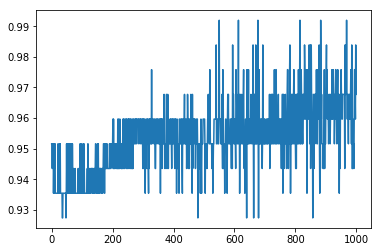

In [39]:
plt.plot(results.history["val_acc"])